# Solutions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from collections import Counter
from pylab import rcParams
import re
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Star_Wars_characters.xlsx')
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,NaN,NaN,no hair,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,none,NaN,NaN,NaN,female,NaN,NaN


In [3]:
df.shape

(87, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  87 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      87 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.9+ KB


In [5]:
df.describe(include='object').T

,count,unique,top,freq
name,87,87,Luke Skywalker,1
hair_color,87,12,none,29
skin_color,85,30,fair,17
eye_color,84,14,brown,21
birth_year,43,36,19BBY,2
gender,87,5,male,62
homeworld,77,48,Naboo,11
species,82,37,Human,35


In [6]:
df.isnull().sum()

name           0
height         6
mass          28
hair_color     0
skin_color     2
eye_color      3
birth_year    44
gender         0
homeworld     10
species        5
dtype: int64

## Task_1 Plotting the Star Wars characters by genders

In [7]:
df.gender.value_counts()

gender
male             62
female           19
no gender         3
none              2
hermaphrodite     1
Name: count, dtype: int64

### - with seaborn barplot

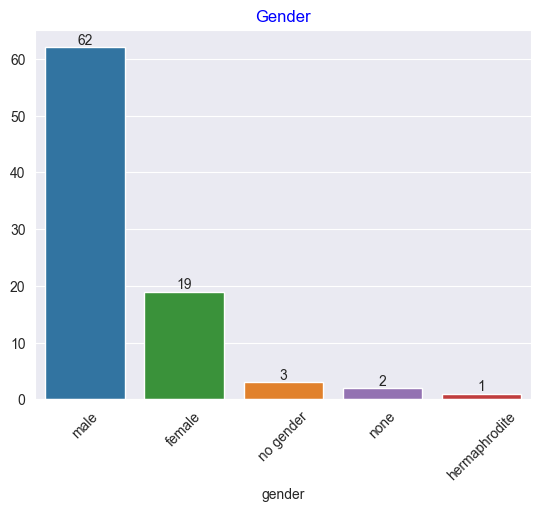

In [8]:
ax = sns.barplot(data=df, x='gender', y=df.index, errorbar=None, 
                 estimator=len, order=df.gender.value_counts().index,
                 hue='gender')

ax.set_xlabel('gender'); ax.set_ylabel(''); ax.set_title('Gender')
ax.tick_params(axis='x', labelrotation=45)
ax.title.set_color('blue')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()+0.5), ha='center')

### - with seaborn countplot

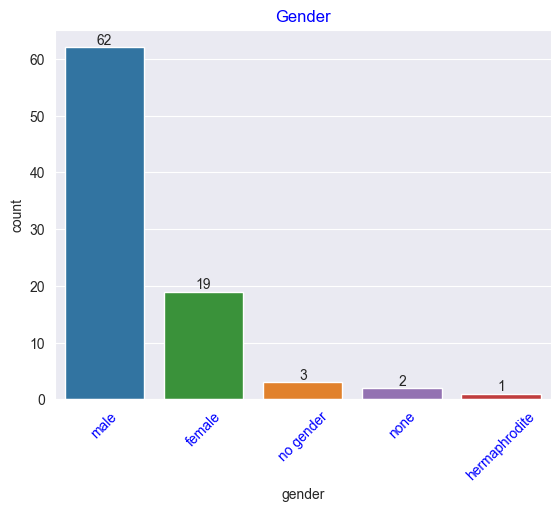

In [9]:
ax = sns.countplot(data=df, x='gender', hue='gender', order=df.gender.value_counts().index)
# or can type order=['male', 'female', 'no gender', 'none', 'hermaphrodite']

ax.set_xlabel('gender'); ax.set_ylabel('count'); ax.set_title('Gender')  # ax.set(xlabel='gender', ylabel='count', title='Gender')
ax.tick_params(axis='x', colors='blue', labelrotation=45)
ax.title.set_color('blue')

for patch in ax.patches:
    ax.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()+0.5), ha='center')

## Task_2 Plotting the characters by eye color

In [10]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [11]:
df.eye_color.value_counts()

eye_color
brown            21
blue             19
yellow           11
black            10
orange            8
red               5
hazel             3
blue-gray         1
pink              1
red, blue         1
gold              1
green, yellow     1
white             1
dark              1
Name: count, dtype: int64

### - with seaborn barplot

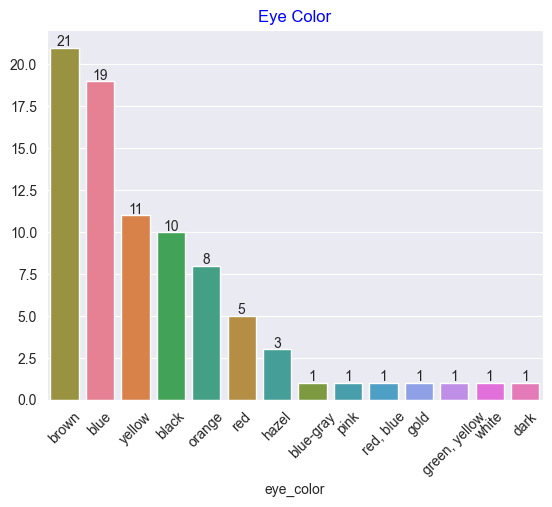

In [12]:
ax = sns.barplot(data=df, x='eye_color', y=df.index, estimator=len, 
                 errorbar=None, hue='eye_color', legend=None,
                 order=df.eye_color.value_counts().index)

ax.set_ylabel(''); ax.set_title('Eye Color'); ax.title.set_color('blue')
ax.tick_params(axis='x', rotation=45)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()+0.1), ha='center')

### - with seaborn countplot

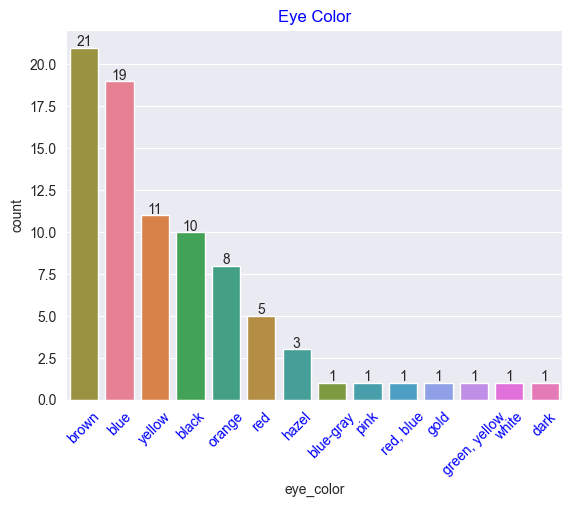

In [13]:
ax  = sns.countplot(data=df, x='eye_color', hue='eye_color', 
                    order=df.eye_color.value_counts().index, legend=None)

ax.set_title('Eye Color'); ax.title.set_color('blue')
ax.tick_params(axis='x', rotation=45, colors='blue')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()+0.1), ha='center')

## Task_3 - Plotting the MASS under 3 groups: "High_mass", "Normal_mass", "Low_mass

In [14]:
def mass_category(x):
    if x >= 100:
        return 'High_mass'
    elif (x > 50) and (x < 100):
        return 'Normal_mass'
    elif x <= 50:
        return 'Low_mass'

df['mass_category'] = df.mass.apply(mass_category)

In [132]:
df.mass_category.value_counts(dropna=False)

mass_category
Normal_mass    36
None           28
Low_mass       13
High_mass      10
Name: count, dtype: int64

### - with seaborn barplot

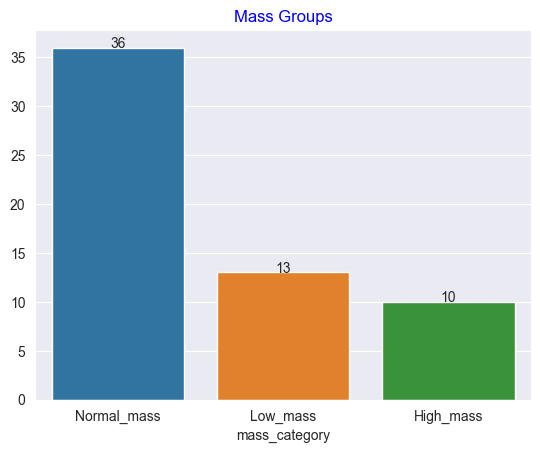

In [26]:
ax = sns.barplot(data=df, x='mass_category', y=df.index, estimator=len, hue='mass_category', legend=None)

ax.set_ylabel(''); ax.set_title('Mass Groups')
ax.title.set_color('Blue')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha='center')

### - with seaborn countplot

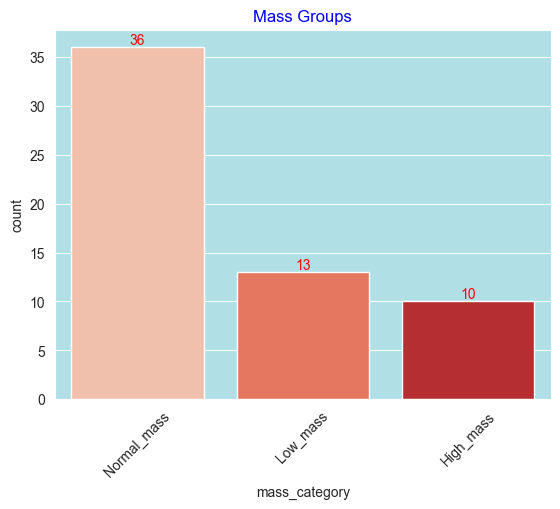

In [49]:
ax = sns.countplot(data=df, x='mass_category', hue='mass_category', legend=None, palette='Reds')

ax.set_title('Mass Groups'); ax.title.set_color('Blue')
ax.tick_params(axis='x', rotation=45)
ax.set_facecolor('#B0E0E6')

for i in range(len(ax.patches)):
    ax.bar_label(ax.containers[i], color='red')

## Task_4 - Plotting the species top 5

In [50]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass


In [57]:
df.species.value_counts().head()

species
Human       35
Droid        5
Gungan       3
Mirialan     2
Wookiee      2
Name: count, dtype: int64

### - with seaborn barplot

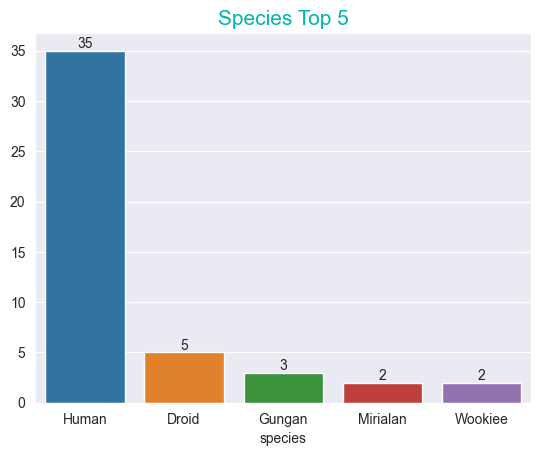

In [104]:
ax = sns.barplot(x=df.species.value_counts().head().index, y=df.species.value_counts().head().values,
                 palette='tab10')

ax.set_title('Species Top 5'); ax.title.set_color('#00b3b3'); ax.title.set_fontsize(15)

for i in range(len(df.species.value_counts().head())):
    ax.bar_label(ax.containers[i])

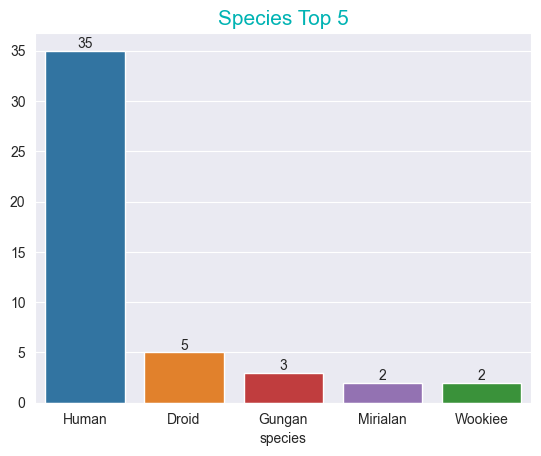

In [97]:
df_new = df[(df.species == 'Human') | (df.species == 'Droid') | (df.species == 'Gungan') | (df.species == 'Mirialan') | (df.species == 'Wookiee')]

ax = sns.barplot(data=df_new, x='species', y=df_new.index, estimator=len, 
                 hue='species', order=df.species.value_counts().head().index)

ax.set_ylabel(''); ax.set_title('Species Top 5'); ax.title.set_color('#00b3b3')
ax.title.set_fontsize(15)

for i in range(len(df.species.value_counts().head())):
    ax.bar_label(ax.containers[i])

### - with seaborn countplot

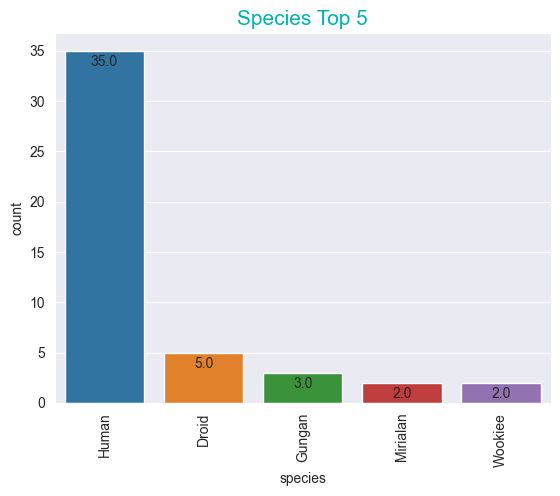

In [121]:
ax = sns.countplot(data=df_new, x='species', palette='tab10', 
                   order=df.species.value_counts().head().index)

ax.set_title('Species Top 5'); ax.title.set_color('#00b3b3'); ax.title.set_fontsize(15)
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.annotate(text=p.get_height(), xy=(p.get_x()+0.4, p.get_height()-1.5), ha='center')

## Task_5 - Plotting the characters by skin_color top 7

In [123]:
df.skin_color.value_counts().head(7)

skin_color
fair     17
light    11
green     6
grey      6
dark      6
pale      5
brown     4
Name: count, dtype: int64

### - with seaborn barplot

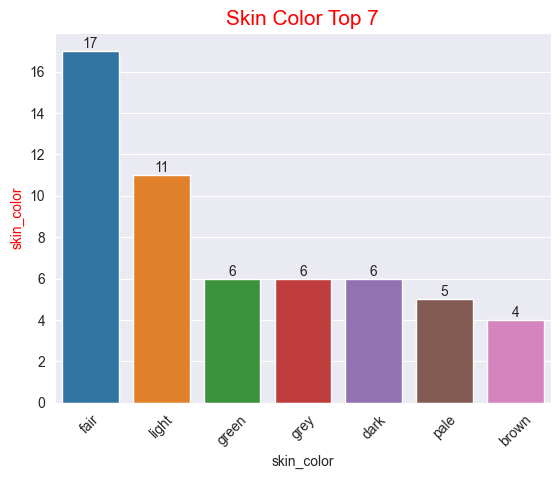

In [136]:
ax = sns.barplot(x=df.skin_color.value_counts().head(7).index, y=df.skin_color.value_counts().head(7).values,
                 palette='tab10')

ax.set_ylabel('skin_color'); ax.yaxis.label.set_color('red');
ax.set_title('Skin Color Top 7'); ax.title.set_color('red'); ax.title.set_fontsize(15)
ax.tick_params(axis='x', rotation=45)

for i in range(len(df.skin_color.value_counts().head(7))):
    ax.bar_label(ax.containers[i])

### - with seaborn countplot

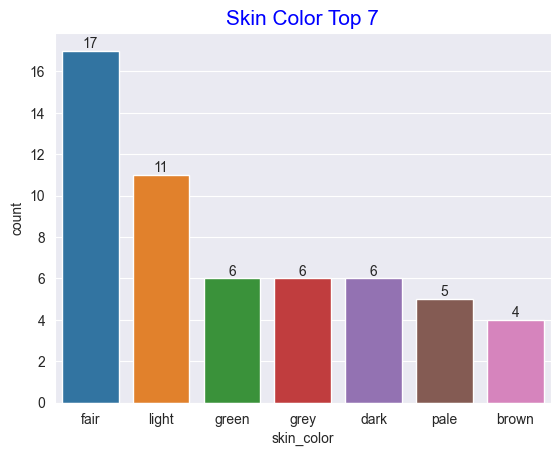

In [148]:
ax = sns.countplot(data=df, x='skin_color', order=df.skin_color.value_counts().head(7).index,
                   palette='tab10')

ax.set_title('Skin Color Top 7'); ax.title.set(color='blue', fontsize=15)

for i in range(7):
    ax.bar_label(ax.containers[i])

## Task_6 - Plotting the Box plot and Swarm plot

### 6.1 - Plotting the Box plot of height

In [149]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass


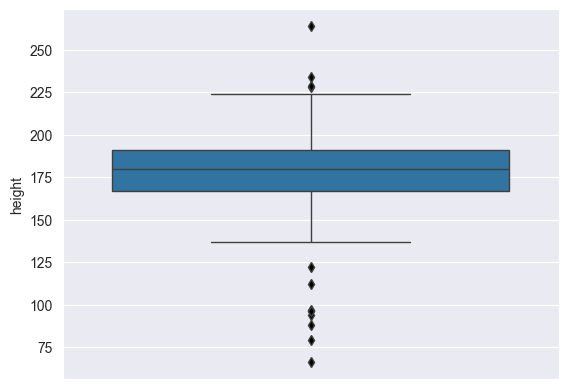

In [168]:
ax = sns.boxplot(data=df, y='height', flierprops=dict(marker='d', markerfacecolor='black', markersize=5))

### 6.2 - Plotting the Swarm Plot of height in genders separeted by mass_cat

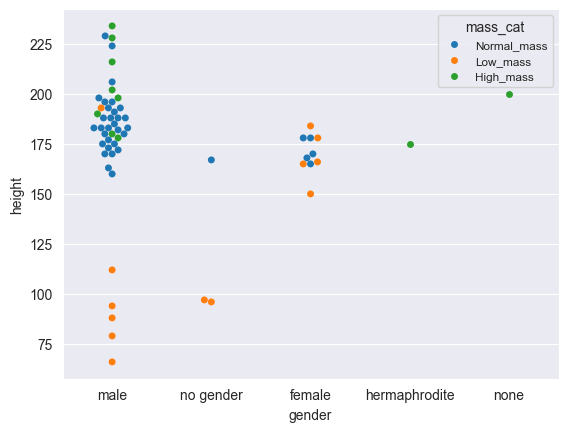

In [190]:
ax = sns.swarmplot(data=df, x='gender', y='height', hue='mass_category')
ax.legend(loc='upper right', title='mass_cat', fontsize=8.5);

## Task_7 - Plotting height histogram

### 7.1 - Plotting the histogram of height

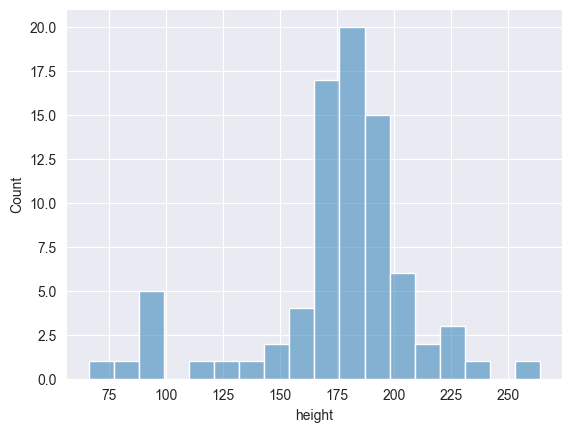

In [205]:
sns.histplot(data=df, x='height', alpha=0.5);

### 7.2 - Plotting the histogram together kde of height

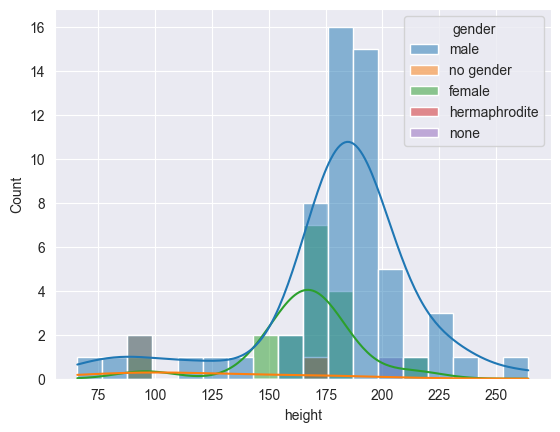

In [197]:
sns.histplot(data=df, x='height', alpha=0.5, hue='gender', kde=True);

### 7.3 - Plotting the histogram height by species and gender

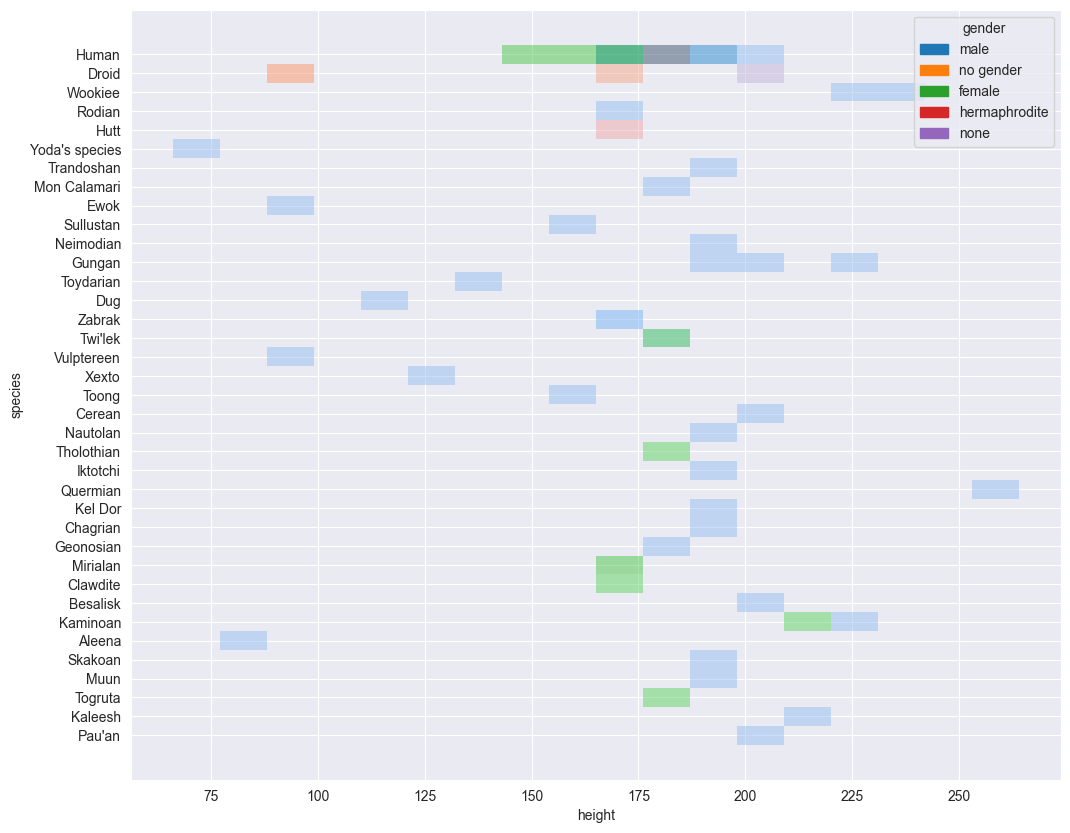

In [202]:
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='height', y='species', hue='gender', alpha=0.5);